In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('D:\\From dell\\from E\\Project 3 -- text to handwriting\\image 1.PNG')

# Converting to grayscale image
grayIm = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# thresholding operation
thresh = 190
newArr = []
for i in range(grayIm.shape[0]):
    for j in range(grayIm.shape[1]):
        if grayIm[i,j] > thresh:
            newArr.append(255)
        else:
            newArr.append(0)

newImg = np.reshape(np.array(newArr), grayIm.shape)

# convolution operation
def conv(kernel, image, thresh):
    coords = []
    for i in range(image.shape[0]-2):
        for j in range(image.shape[1]-2):
            newIm = image[i:i+3, j:j+3]
            if np.sum(np.multiply(newIm, kernel)) == 0:
                coords.append((i,j))
            else:
                pass
            
    Rows = []
    for k in range(len(coords)):
        if coords[k][0] not in Rows:
            Rows.append(coords[k][0])
    
    rows = {}
    for row in Rows:
        count = 0
        for l in range(len(coords)):
            if coords[l][0] == row:
                count += 1
        if count >= thresh:
            rows[row] = count
    
    out = {}
    for r in rows:
        possibleCoords = []
        for t in range(len(coords)):
            if list(coords[t])[0] == r:
                possibleCoords.append(coords[t][1])
        out[r] = possibleCoords
        
    return out

horKer = ([0,0,0], [1,1,1], [0,0,0])
coords1 = conv(horKer, newImg, thresh=170)

# Get the column values

In [41]:
def getConsequtiveColValues(coordinates):
    a = []
    b = 0
    for i in range(len(coordinates)):
        if i+1 < len(coordinates):
            if coordinates[i]+1 == coordinates[i+1]:
                #a.append(coordinates[i])
                b += 1
            else:
                a.append((coordinates[i]-b,coordinates[i]))
                b = 0
    a.append(((coordinates[i]-b,coordinates[i])))
    return a

tr1 = getConsequtiveColValues(coordinates=coords1[85])
tr2 = getConsequtiveColValues(coordinates=coords1[128])
tr3 = getConsequtiveColValues(coordinates=coords1[129])
print(tr1,'\n', tr2,'\n', tr3)

[(208, 249), (284, 326), (360, 402), (435, 477), (510, 552)] 
 [(208, 251), (284, 326), (360, 402), (435, 477), (511, 552)] 
 [(57, 62), (66, 99), (132, 174), (208, 250), (284, 326), (360, 402), (436, 477), (516, 518)]


### Ballpark figure
From the above calculations we get the column values to be:
(57,99), (132,174), (208,250), (284,326), (360,402), (436,477), (510,552)

In [44]:
columns = [57, 99, 132, 174, 208, 250, 284, 326, 360, 402, 436, 477, 510, 552]

# Get the row values

In [8]:
def getConsequtiveNumbers(coordinates):
    a = list(coordinates.keys())
    b = []
    for item in range(len(a)):
        if item+1 >= len(a):
            pass
        elif a[item]+1 == a[item+1]:
            b.append((a[item], a[item+1]))
        else:
            if len(b) == 0:
                b.append(a[item])
            else:
                if type(b[-1]) == tuple:
                    if a[item] not in b[-1]:
                        b.append(a[item])
                else:
                    b.append(a[item])
    return b

rt = getConsequtiveNumbers(coords1)
print(rt)

[85, (128, 129), (152, 153), 196, 220, (263, 264), (287, 288), 331, (355, 356), (398, 399), (422, 423), 466, (490, 491), (533, 534), (557, 558), (602, 603), (626, 627), (670, 671), (694, 695), (737, 738), (761, 762), (805, 806)]


In [15]:
def getRows(coordinates, bias):
    a = []
    for i in range(len(coordinates)):
        if i%2 == 0:
            if type(coordinates[i]) == int:
                a.append(coordinates[i]+bias)
            elif type(coordinates[i]) == tuple:
                a.append(max(coordinates[i])+bias)
        else:
            if type(coordinates[i]) == int:
                a.append(coordinates[i]-bias)
            elif type(coordinates[i]) == tuple:
                a.append(min(coordinates[i])-bias)
    return a

rows = getRows(rt, bias=1)
print(rows)

[86, 127, 154, 195, 221, 262, 289, 330, 357, 397, 424, 465, 492, 532, 559, 601, 628, 669, 696, 736, 763, 804]


In [23]:
def smoothOut(image, upVal, downVal, leftVal, rightVal):
    
    image[:upVal,:] = 255
    image[image.shape[0]-downVal:, :] = 255
    
    image[:, :leftVal] = 255
    image[:, image.shape[1]-rightVal:] = 255

    return image

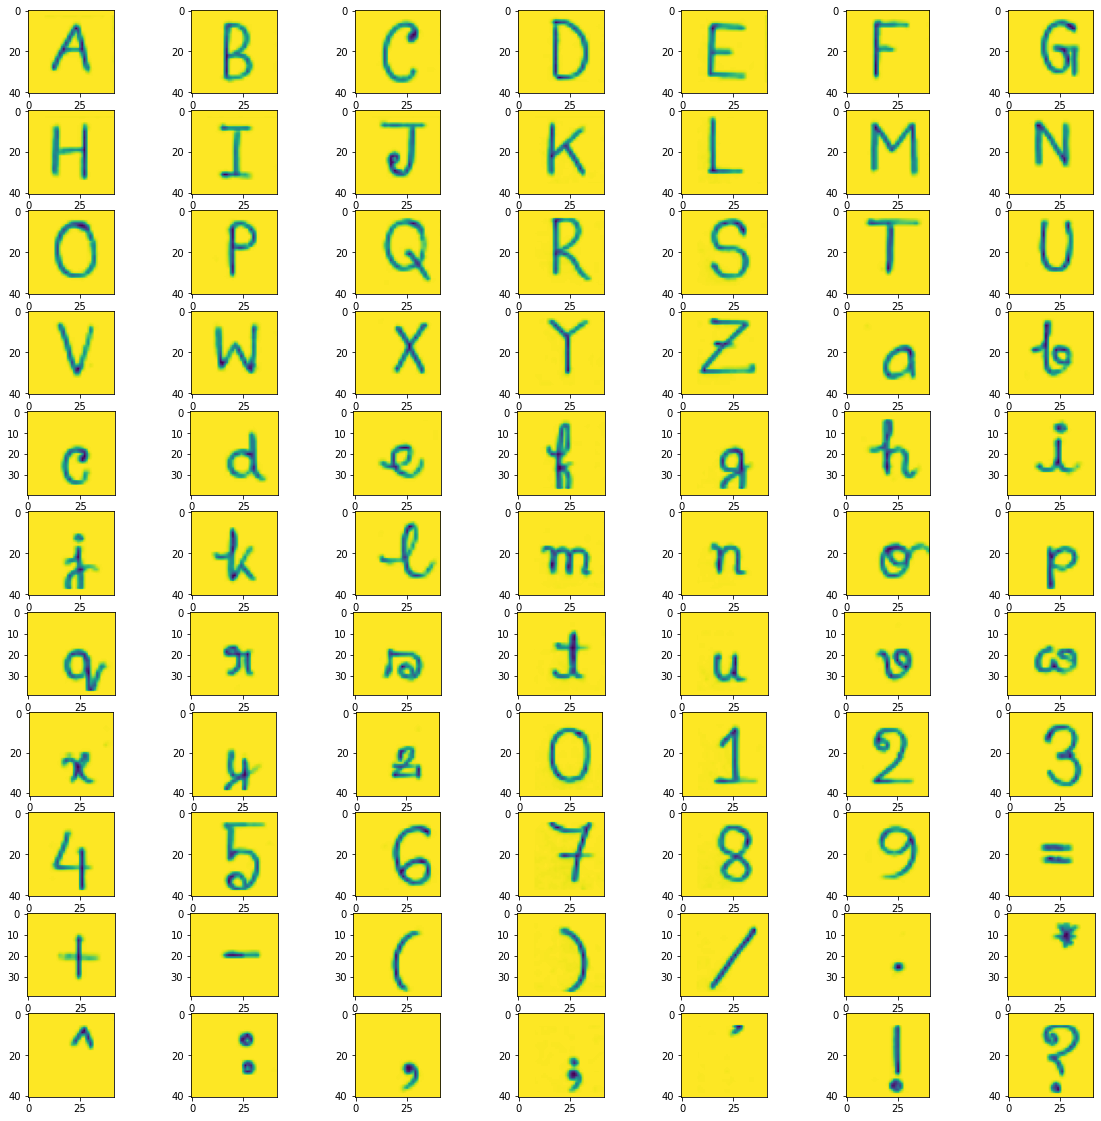

In [51]:
#alphaImgs = []
fig, axes = plt.subplots(nrows=11, ncols=7, figsize=(20,20))
i = 0

for row in axes:    
    j = 0  
    for col in row:
        image = grayIm[rows[i]:rows[i+1], columns[j]:columns[j+1]]
        IMG = smoothOut(image, upVal=3, downVal=1, leftVal=8, rightVal=0)
        col.imshow(IMG)
        #alphaImgs.append(IMG)
        j += 2
    i += 2

plt.show()

# Another approach of selectng the row and column values 
### (Manual selection)

You may have to tweak the numbers a bit to adjust to your image. 

In [24]:
col2col = 133 - 99 + 1
row2row = 152 - 129 + 1
line = 99 - 57 + 1
print('\n','Line: ', line, '\n Col to col: ', col2col, '\n Row to row: ', row2row)


 Line:  43 
 Col to col:  35 
 Row to row:  24


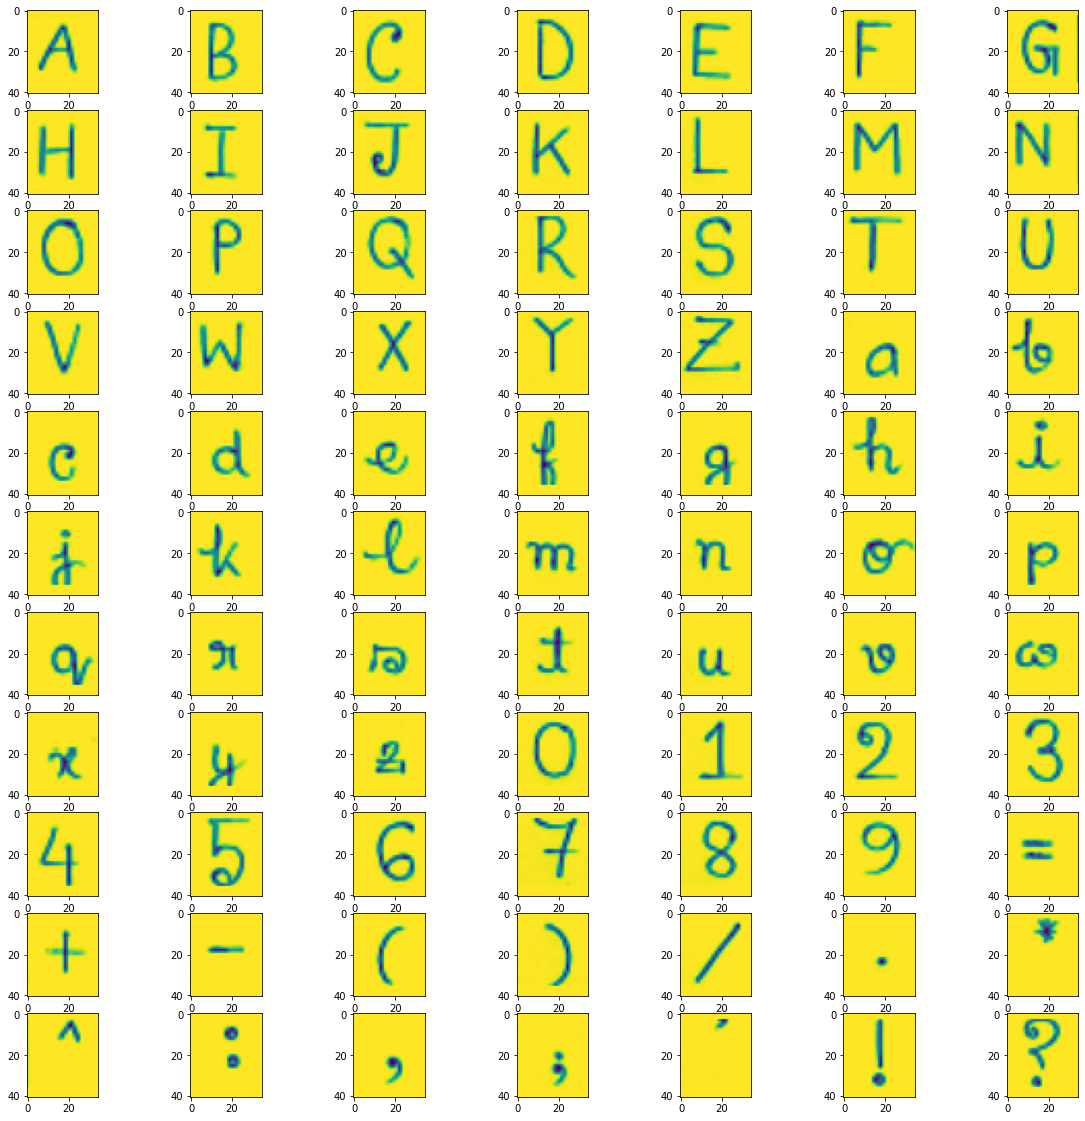

In [27]:
col2col = 33 ## See... previously we found this value to be 35
row2row = 27 # 25 ## After calculating, previously we found this to be 24 

rowSpan = 41 # 41 ## line
colSpan = 35 ## could be made to be equal to the line i.e. 43. But for a more natural effect, reduced this value.

alphaImgs = []
fig, axes = plt.subplots(nrows=11, ncols=7, figsize=(20,20))

line1_row = 86 # row value of the first line from the coordinate
row_dis = rowSpan + row2row
col_dis = colSpan + col2col + (43-colSpan)

for row in axes:    
    line1_col = 63 # column value of the first line from the coordinate + 5 (since we are reducing the span, 5 from left, 5 from right)
    for col in row:
        image = grayIm[line1_row:line1_row+rowSpan, line1_col:line1_col+colSpan]
        IMG = smoothOut(image, upVal=1, downVal=1, leftVal=0, rightVal=0)
        col.imshow(IMG)
        alphaImgs.append(IMG)
        line1_col += col_dis
    line1_row += row_dis

plt.show()

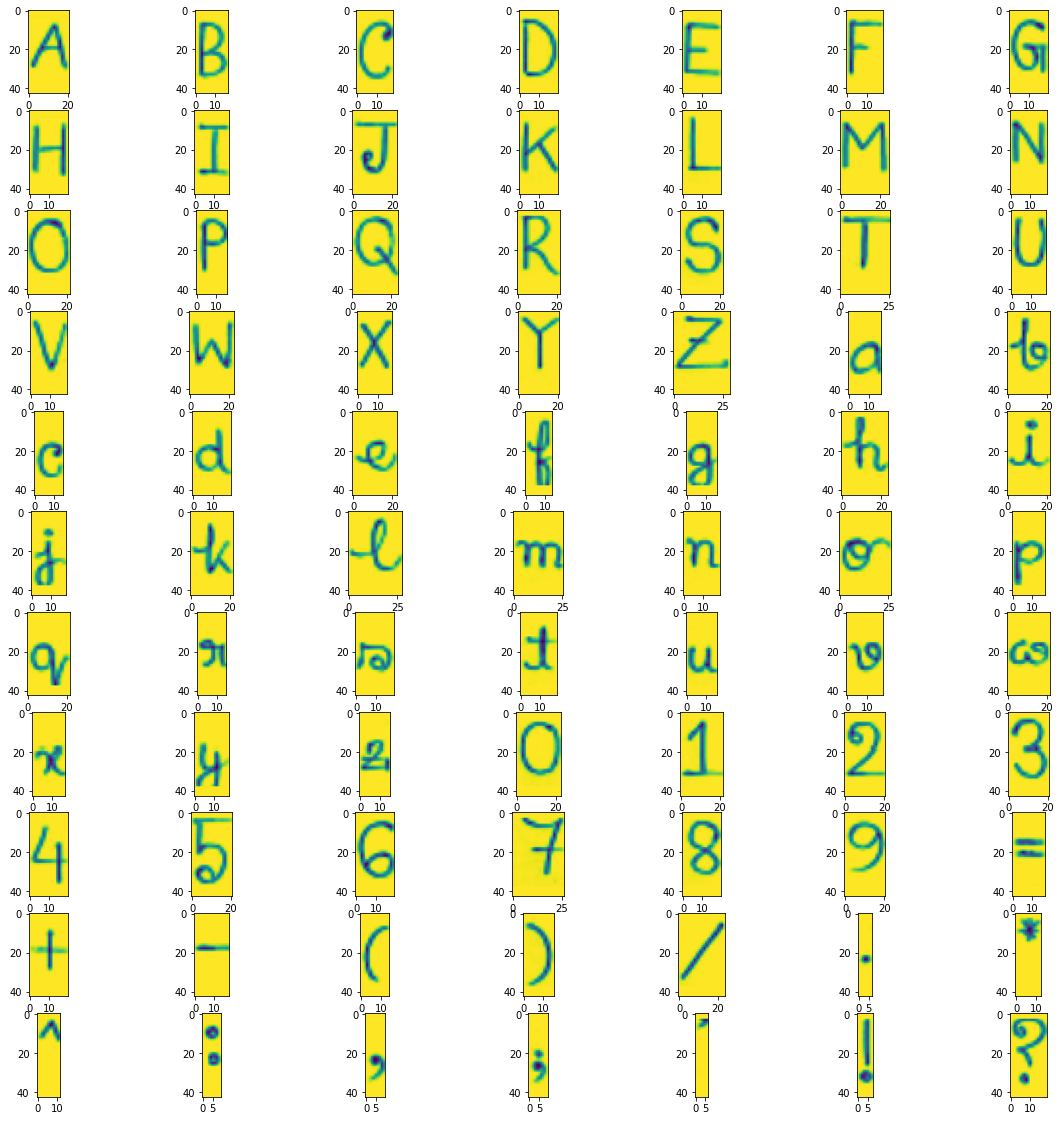

In [37]:
def alphSpan(image, bias):
    cols = []
    for col in range(image.shape[1]):
        if np.sum(image[:,col]) < 10900: #255*42:
            cols.append(col)
            
    newCols = checkForConsequtiveNumbers(cols)
    return image[:,newCols[0] - bias: newCols[-1] +bias]

def getAlphaFinal(alphabetsDict):
    dictList = []
    for i in range(len(alphabetsDict)):
        interImg = alphabetsDict[i]
        finalImg = alphSpan(interImg, bias = 1)
        dictList.append(finalImg)
    return dictList

finalAlphaImgs = getAlphaFinal(alphaImgs)

fig, axes = plt.subplots(nrows=11, ncols=7, figsize=(20,20))
item = 0
for row in axes:    
    for col in row:
        col.imshow(finalAlphaImgs[item])
        item += 1 
plt.show()

In [39]:
alphaFile = open("alphabet list.txt", "r")
alphaList = list(alphaFile.read())

alphaDict = {}
for i in range(len(alphaList)):
    alphaDict[alphaList[i]] = finalAlphaImgs[i]

In [40]:
demo = open("demo.txt", "r")
demoList = list(demo.read())

In [22]:
paper = input('Paper size: ')
# font = input('Font size (pt): ')
margin = input('Margin (in inch): ')

Paper size: a4
Margin (in inch): 1


In [23]:
paperSize = ( 1122, 800)

# fontSize = int(font) * (17/12.75)

marginSize = int(margin) * 96

print(paperSize, marginSize)

(1122, 800) 96


In [41]:
# Get the individual words

words = []
word = []
separators = [' ', '\n', '.', ',']
for i in range(len(demoList)):
    if demoList[i] not in separators:
        word.append(demoList[i])
    else:
        words.append(word)
        word = demoList[i]
        words.append(word)
        word = []

In [43]:
line2line = 30 # line to line distance
alph2alph = 30 # alphabet to alphabet distance

In [44]:
WORDS = {}
for i in range(len(words)):
    NewWord = np.empty((43,0))
    for j in words[i]:
        if j == ' ':
            NewWord = j
        elif j == '\n':
            NewWord = j
        else:
            a = np.hstack((NewWord, alphaDict[j]))
            NewWord = a[:, :a.shape[1]-(alphaDict[j].shape[1]-alph2alph)]           
    WORDS[i] = NewWord

In [45]:
def ShowWord(item):
    #print(WORDS[item], isinstance(WORDS[item], str))
    if isinstance(WORDS[item], str):
        print('String')
    else:
        print(WORDS[item].shape)
        plt.imshow(WORDS[item])

(43, 88)


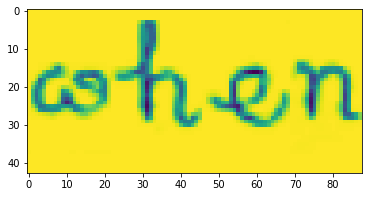

In [46]:
ShowWord(item=116)

In [47]:
ShowWord(item=3)

String


In [48]:
item = 1
if WORDS[item] == ' ':
    print('space')
elif WORDS[item] == '\n':
    print('new line')

new line


In [50]:
pages = {}
page = 1

demoOut = np.ones((paperSize))*255    
output = demoOut[marginSize : paperSize[0]-marginSize, marginSize : paperSize[1] - marginSize]

row = 0
col = 0

for i in WORDS:
    if isinstance(WORDS[i], str):
        if WORDS[i] == '\n':
            row += line2line*2
            col = 0
        elif WORDS[i] == ' ':
            if col == 0: 
                pass
            elif output.shape[1] - col > 35:
                output[row:row+43, col:col+35] = np.ones((43,35))*255 
                col += colSpan

    elif WORDS[i].shape[0] < output.shape[0] - row and WORDS[i].shape[1] < output.shape[1] - col:
        output[row:row+WORDS[i].shape[0], col:col+WORDS[i].shape[1]] = WORDS[i]
        col += WORDS[i].shape[1]

    elif WORDS[i].shape[1] > output.shape[1] - col:
        row += line2line*2
        col = 0
        if WORDS[i].shape[0] < output.shape[0] - row:
            output[row:row+WORDS[i].shape[0], col:col+WORDS[i].shape[1]] = WORDS[i]
            col += WORDS[i].shape[1]
        else:
            demoOut = np.ones((paperSize))*255  
            demoOut[marginSize : paperSize[0]-marginSize, marginSize : paperSize[1] - marginSize] = output
            pages[page] = demoOut
            
            page += 1
            
            demoOut = np.ones((paperSize))*255    
            output = demoOut[marginSize : paperSize[0]-marginSize, marginSize : paperSize[1] - marginSize]
            
            row = 0
            col = 0
            
            if isinstance(WORDS[i], str) == False:
                output[row:row+WORDS[i].shape[0], col:col+WORDS[i].shape[1]] = WORDS[i]
                col += WORDS[i].shape[1]
     
    demoOut = np.ones((paperSize))*255  
    demoOut[marginSize : paperSize[0]-marginSize, marginSize : paperSize[1] - marginSize] = output
    pages[page] = demoOut

In [51]:
def saveFinalOutcome(allThePages):
    for page in allThePages:
        
        cv2.imwrite('Page ' + str(page)+'.jpeg', allThePages[page])
        
saveFinalOutcome(pages)